In [7]:
import pandas as pd
import numpy as np

covdata = pd.read_csv("COVID19_line_list_data.csv")

#Take a look
covdata.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Take a look at the columns
print(covdata.columns)

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')


In [9]:
# Drop all rows that do not have age data
covdata = covdata.dropna(subset=["age"])

In [24]:
#clean up the "death" column, convert entries into integers
def toInts(entry):
    if entry != '0' and entry != '1':
        return 1
    return int(entry)

#A pandas way of mapping a function to a column and creating a new column from the result.
deathIntSeries = covdata["death"].apply(toInts)
covdata["intDeaths"] = deathIntSeries

#make sure we're on the right track
covdata["intDeaths"].value_counts()

0    785
1     58
Name: intDeaths, dtype: int64

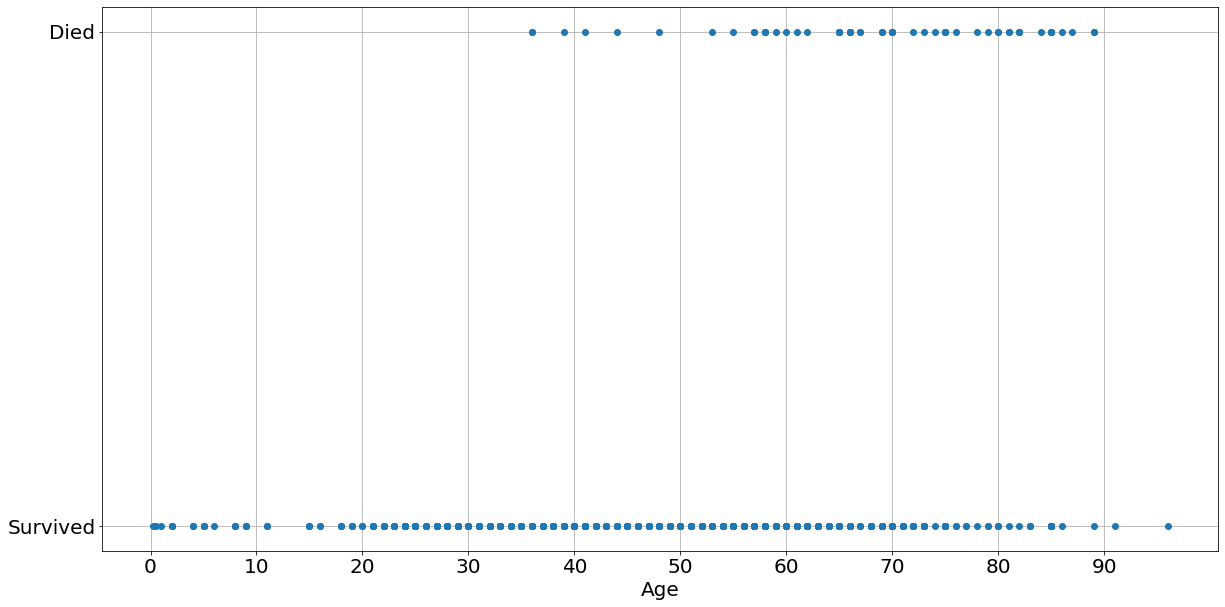

In [20]:
#Use the cleaned up dataframe to plot age against deaths
import matplotlib.pyplot as plt
plt.plot(covdata["age"], covdata["intDeaths"], linestyle="none", marker="o")
plt.xlabel("Age", size=20)
plt.xticks(ticks=np.arange(0, 100, step=10), size=20)
plt.yticks(ticks=[0,1], labels=["Survived", "Died"], size=20)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(20, 10)

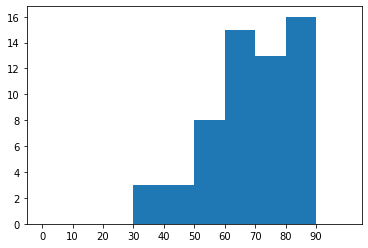

In [25]:
import matplotlib.pyplot as plt
#Get a dataframe that only contains deaths. What does its  histogram look like?
deathPositives = covdata[ covdata['intDeaths'] == 1 ]
n,b,p = plt.hist(deathPositives["age"], bins=10, range=(0,100))
_ = plt.xticks(ticks=np.arange(100, step=10))

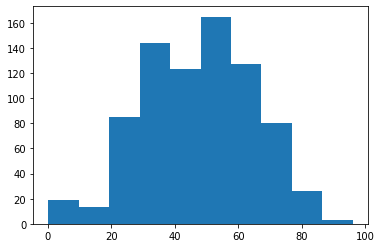

In [26]:
#Do the same as above, except for the dataframe that contains only survivors
survivors = covdata[ covdata["intDeaths"] == 0 ]
_ = plt.hist(survivors["age"])


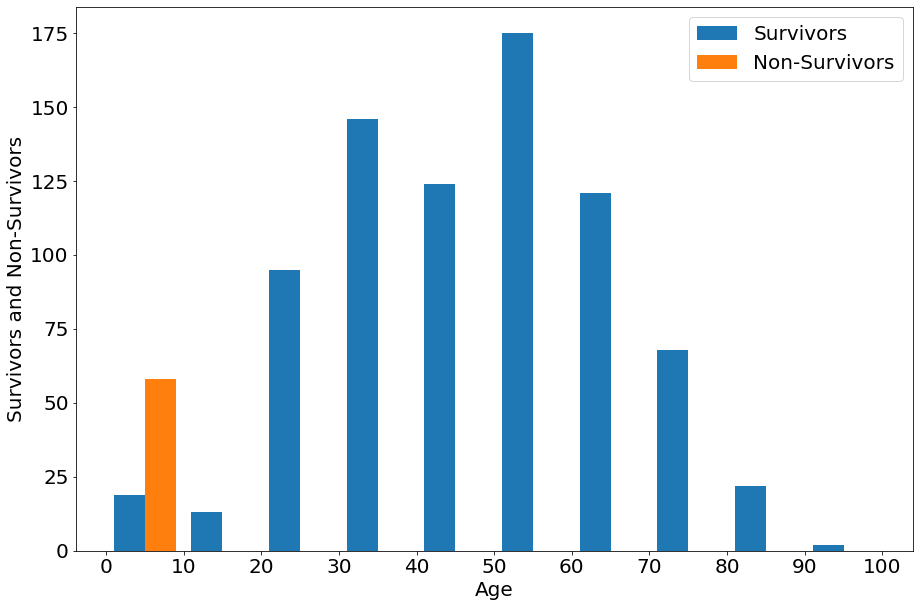

In [27]:
#putting them together.
frequency,b,p = plt.hist([survivors["age"], deathPositives["intDeaths"]], bins=10, range=(0,100),
            label=["Survivors", "Non-Survivors"])
_ = plt.xticks(ticks=np.arange(101, step=10), size=20)
_ = plt.yticks(size=20)
_ = plt.xlabel("Age", size=20)
_ = plt.ylabel("Survivors and Non-Survivors", size=20)
_ = plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(15, 10)

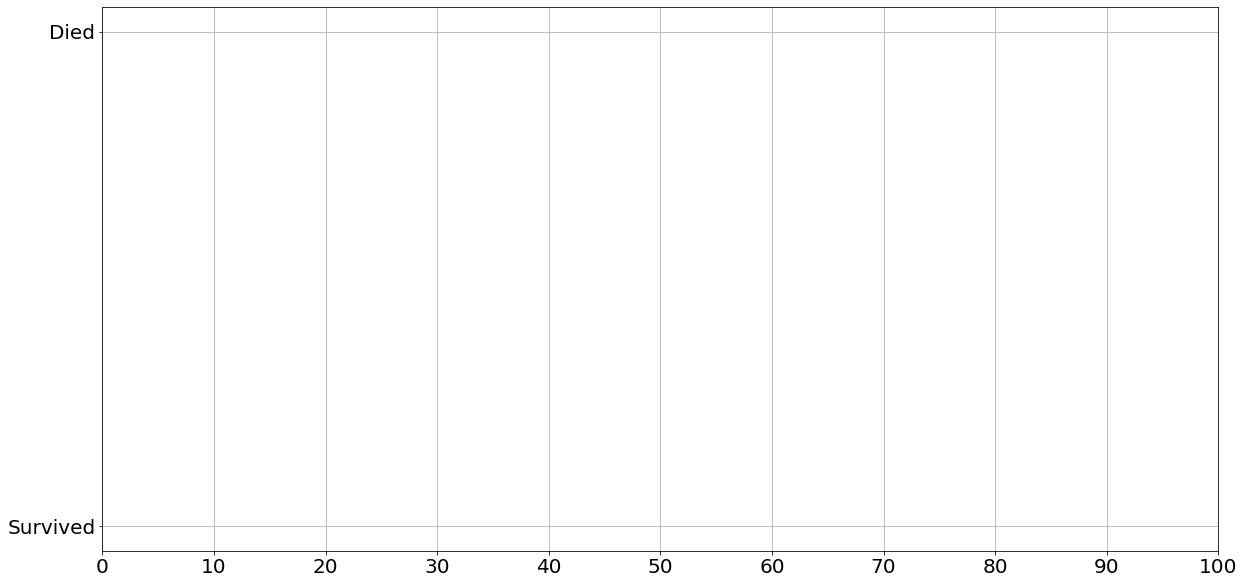

In [15]:
#Use the counts of survivors/non-survivors to make a new scatter plot.
#Get the centers of the histogram bins. 
#Plot 10 points (1 for each bin) along the horizontals on the chart.
#1 = deaths and 0 = survivors
#Scale the size of the points by value of the
#frequency list at the corresponding bin.
#frequency[0] --> survivors
#frequency[1] --> deaths
bins = np.linspace(0.5, 9.5, num=10) * 10
_ = plt.scatter(bins, [1] * len(bins), s=frequency[1] * 50, marker=".")
_ = plt.scatter(bins, [0] * len(bins), s=frequency[0] * 50, marker=".")
_ = plt.xticks(ticks=np.arange(101, step=10), size=20)
_ = plt.yticks(ticks=[0,1], labels=["Survived", "Died"], size=20)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(20,  10)
